In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Import the cancer data and understand features and target

In [2]:
# Import necessary Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("gbsg.csv")

In [4]:
df.shape

(686, 12)

In [5]:
df.head()

,Unnamed: 0,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
0,1,132,49,0,18,2,2,0,0,0,1838,0
1,2,1575,55,1,20,3,16,0,0,0,403,1
2,3,1140,56,1,40,3,3,0,0,0,1603,0
3,4,769,45,0,25,3,1,0,4,0,177,0
4,5,130,65,1,30,2,5,0,36,1,1855,0


# 2. Understand features importance

## It is necessary to Understand meaning of Some important features to proceed further

1) Meno (menopausal status (0= premenopausal, 1= postmenopausal))
 -- It refers to a woman's hormonal status and whether she has reached menopause or not. Menopause is a natural process that occurs in women typically around the age of 45 to 55, marking the end of their reproductive years. Menopausal status is important in breast cancer because hormonal factors play a significant role in the development, progression, and treatment of the disease
 
2) Grade
-- In breast cancer, "grade" refers to a measure of how abnormal the cancer cells look under a microscope compared to normal cells. The grade provides information about the aggressiveness or the likelihood of the cancer to grow and spread. It helps in determining the treatment approach and predicting the patient's prognosis

3) Nodes
--  It helps to determine how much spread of cancer cells into organs and also helps guide the selection of therapies such as surgery, radiation, chemotherapy, or targeted treatments.Lower is better

4) pgr (progesterone receptors (fmol/l))
-- Progesterone receptors (PR) are proteins found on the surface of breast cancer cells. Their presence indicates that the cancer cells are responsive to the hormone progesterone, which is naturally produced in the body

5) er (estrogen receptors (fmol/l))
-- estrogen receptors (ER), helps determine if the cancer cells are sensitive to hormonal therapies

6) Harmone (hormonal therapy, 0= no, 1= yes)
-- Harmone features indicates that how the hormonals respond to the cancer Therepy. if observed +ve means 1 and if found -ve means hormonal are not responsive to therepy

7) rfstime (recurrence free survival time)
-- Rrstime feature in breast cancer refers to the length of time a patient lives without experiencing any signs or symptoms of cancer after the completion of initial treatment.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  686 non-null    int64
 1   pid         686 non-null    int64
 2   age         686 non-null    int64
 3   meno        686 non-null    int64
 4   size        686 non-null    int64
 5   grade       686 non-null    int64
 6   nodes       686 non-null    int64
 7   pgr         686 non-null    int64
 8   er          686 non-null    int64
 9   hormon      686 non-null    int64
 10  rfstime     686 non-null    int64
 11  status      686 non-null    int64
dtypes: int64(12)
memory usage: 64.4 KB


1) dataset contains only int type datatype

2) No any missing value present

In [7]:
df.describe()

,Unnamed: 0,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,343.500000,966.061224,53.052478,0.577259,29.329446,2.116618,5.010204,109.995627,96.252187,0.358601,1124.489796,0.435860
std,198.175427,495.506249,10.120739,0.494355,14.296217,0.582808,5.475483,202.331552,153.083963,0.479940,642.791948,0.496231
min,1.000000,1.000000,21.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,172.250000,580.750000,46.000000,0.000000,20.000000,2.000000,1.000000,7.000000,8.000000,0.000000,567.750000,0.000000
50%,343.500000,1015.500000,53.000000,1.000000,25.000000,2.000000,3.000000,32.500000,36.000000,0.000000,1084.000000,0.000000
75%,514.750000,1340.500000,61.000000,1.000000,35.000000,2.000000,7.000000,131.750000,114.000000,1.000000,1684.750000,1.000000
max,686.000000,1819.000000,80.000000,1.000000,120.000000,3.000000,51.000000,2380.000000,1144.000000,1.000000,2659.000000,1.000000


In [8]:
# Drop Unrelevant column from the dataset
df.drop(columns =["Unnamed: 0"],inplace=True)

# 3. EDA (Exploratory Data Analysis)

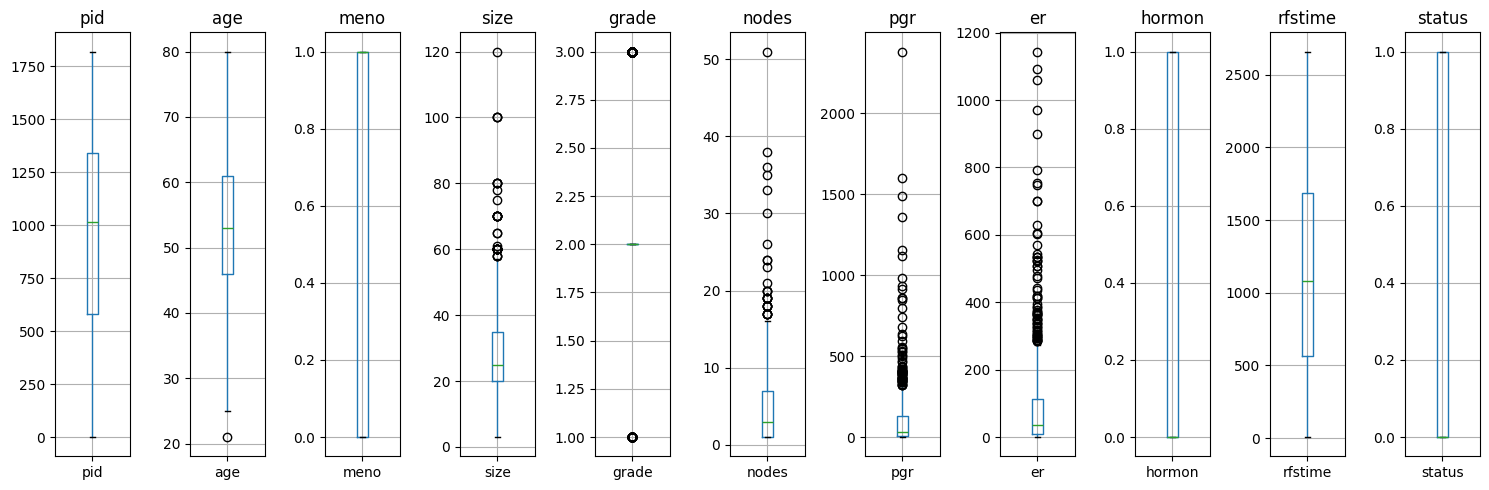

In [9]:
# Let's check box plot of each numerical column:
columns = df.columns.tolist()
fig,ax = plt.subplots(1, len(columns),figsize=(15,5))

for i,col in enumerate(columns):
    df.boxplot(column=col, ax= ax[i])
    ax[i].set_title(col)
    
plt.tight_layout()
plt.show()

Inference
1) we can see that Size,Nodes , pgr, er columns having most of the outliers datavaues

2) As we have only 686 Rows it is not recommend to do drop outlier values as it lost the data and may affect training

## 3.1 Univariate Analysis

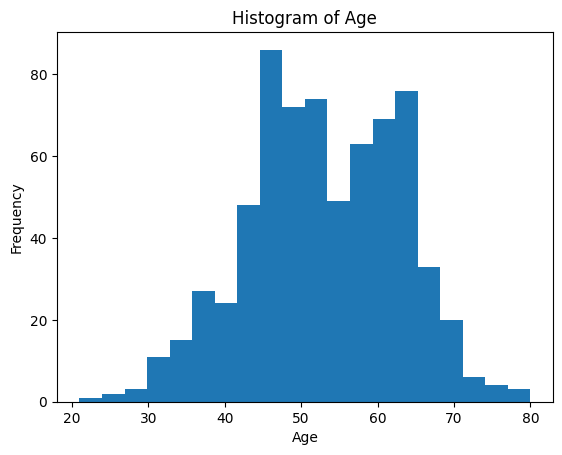

In [10]:
plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [11]:
## Maximum patients fall into age 45-65 Years

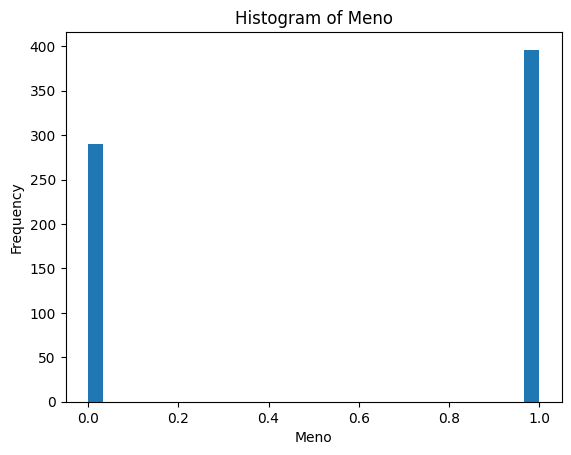

In [11]:
plt.hist(df['meno'], bins=30)
plt.xlabel('Meno')
plt.ylabel('Frequency')
plt.title('Histogram of Meno')
plt.show()

Approx 370 nos patients had postmenopausal

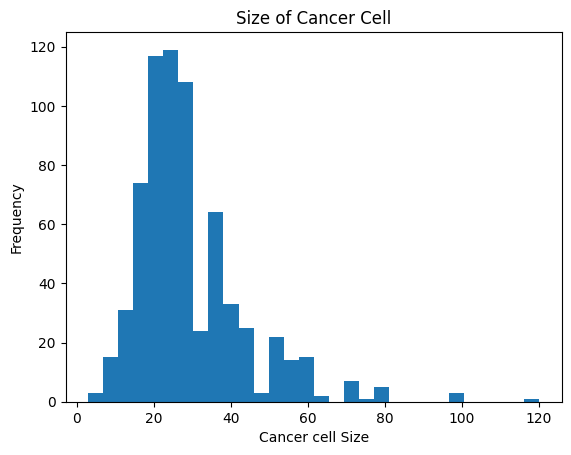

In [12]:
plt.hist(df['size'], bins=30)
plt.xlabel('Cancer cell Size')
plt.ylabel('Frequency')
plt.title('Size of Cancer Cell')
plt.show()

In [14]:
## Maximum patients of cancer cell size ranges between 15-45

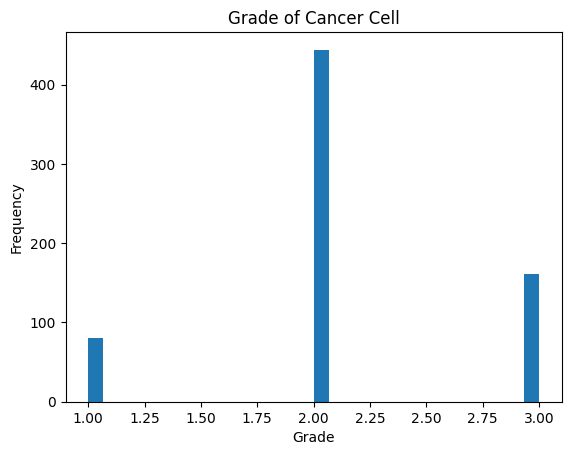

In [13]:
plt.hist(df['grade'], bins=30)
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Grade of Cancer Cell')
plt.show()

In [16]:
## Maximum Cancer cell Grade observed 2 Approx 450 as per histogram

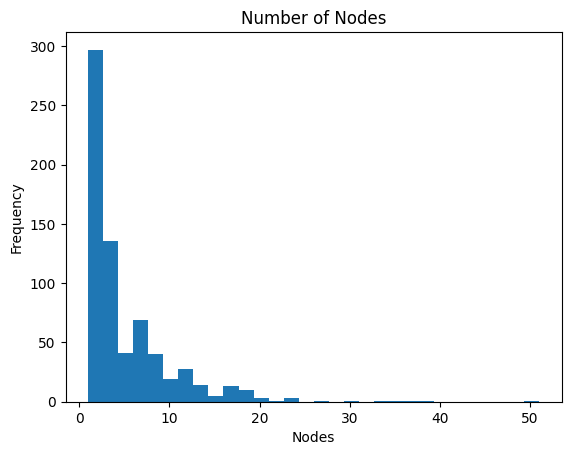

In [14]:
plt.hist(df['nodes'], bins=30)
plt.xlabel('Nodes')
plt.ylabel('Frequency')
plt.title('Number of Nodes')
plt.show()

In [15]:
## Cancer cell Nodes ranges between 2-6 for maximum patients

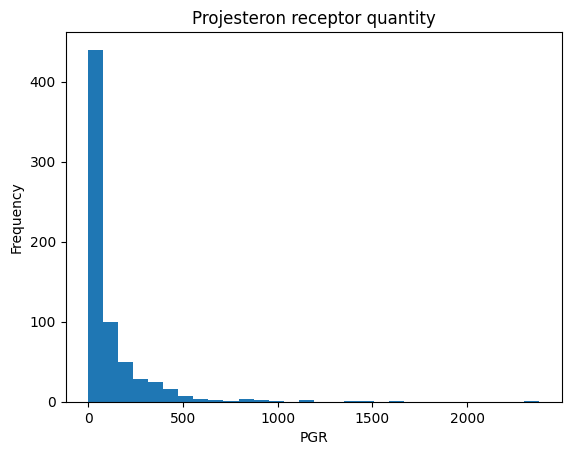

In [16]:
plt.hist(df['pgr'], bins=30)
plt.xlabel('PGR')
plt.ylabel('Frequency')
plt.title('Projesteron receptor quantity')
plt.show()

In [17]:
## Projesteron receipter quantity falls between 0-70 of maximum patients

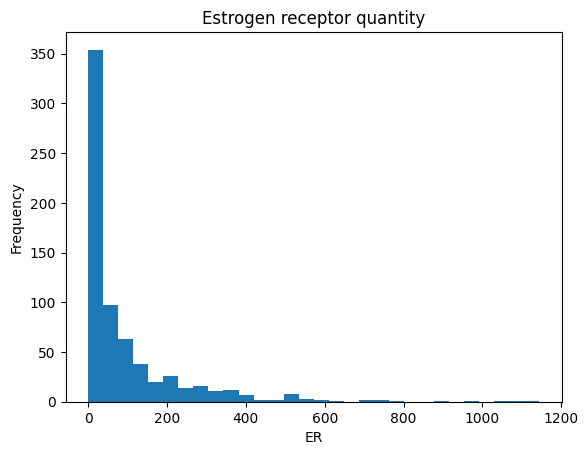

In [18]:
plt.hist(df['er'], bins=30)
plt.xlabel('ER')
plt.ylabel('Frequency')
plt.title('Estrogen receptor quantity')
plt.show()

In [22]:
## Estrogen recipter quanity falls between 0-70 for many patients

<Axes: >

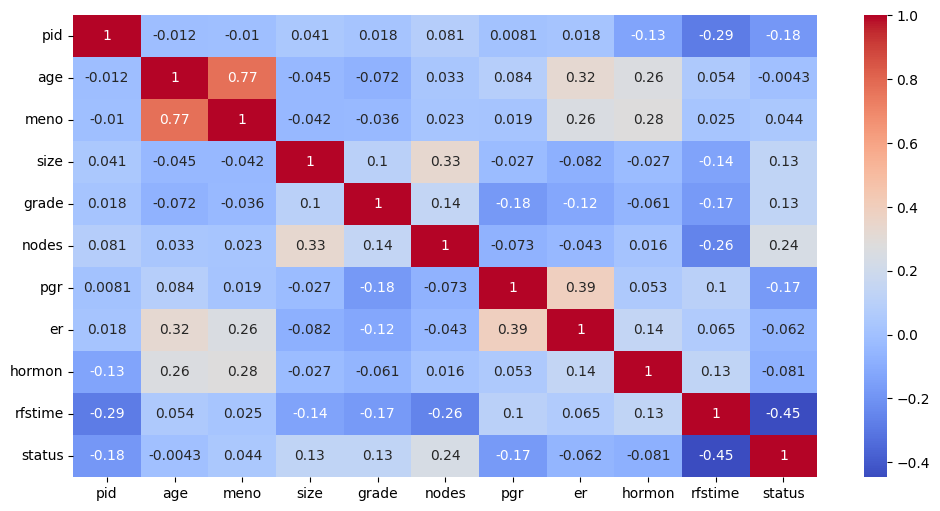

In [19]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True, cmap = 'coolwarm')

Inference
1) Only Age and Meno columns higher +ve corelation of observed which is 0.77 

2) Means that Age is propoortional to menopausal

3) No higher muticolinerity observed between features So we can use ML model directly else we need to normalize if Strong co-relation

In [20]:
df.shape

(686, 11)

In [21]:
# Seperate Features and Target Variable
X = df.iloc[:,0:10].values
y = df.iloc[:,[10]].values

In [22]:
# Train & Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=24)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(548, 10)
(138, 10)
(548, 1)
(138, 1)


In [23]:
# Feature Scaling
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

# 4. Model Building

## 4.1 Logistic Regression

In [24]:
lr_model = LogisticRegression(max_iter = 2500,verbose=0)
lr_model.fit(X_train_scaled,y_train)
y_preds_lr = lr_model.predict(X_test_scaled)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
score = accuracy_score(y_test,y_preds_lr)
print(score)

0.7391304347826086


## 4.2 Random Forest - Ensemble Technique

In [26]:
# Random Forest Classifier  -Ensemble Learning
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=3000, max_depth=10, random_state=42, n_jobs=-1)
rf_model = rf.fit(X_train_scaled,y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
rf_score = accuracy_score(y_test,y_pred_rf)
print(f"Accuracy Score:{rf_score}")
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"F1 Score is:{f1_rf}")
# confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy Score:0.7536231884057971
F1 Score is:0.7493944510259352

Confusion Matrix:
[[62  9]
 [25 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78        71
           1       0.82      0.63      0.71        67

    accuracy                           0.75       138
   macro avg       0.77      0.75      0.75       138
weighted avg       0.77      0.75      0.75       138



## **4.2.a. RF optimized**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

# Convert y_train and y_test to 1D arrays using ravel()
y_train = y_train.ravel()
y_test = y_test.ravel()

# hyperparameters
param_grid = {
    'n_estimators': [100, 300, 500, 800],    # Number of trees
    'max_depth': [None, 5, 10, 15],          # Maximum depth 
    'min_samples_split': [2, 5, 10],         # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum number samples at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'] # Number of features at each split
}

# random state
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# GridSearchCV 
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=1)

grid_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters:")
print(grid_search.best_params_)

# Use the best hyperparameters on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Optimized Random Forest Accuracy: {accuracy:.4f}")
print(f"Optimized Random Forest Weighted F1 Score: {f1:.4f}")


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


KeyboardInterrupt: 

## 4.3 Gradient Boosting

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model = gb.fit(X_train_scaled,y_train)
y_pred_gb = gb_model.predict(X_test_scaled)
gb_score = accuracy_score(y_test,y_pred_gb)
print(f"Accuracy Score:{gb_score}")
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
print(f"F1 Score:{f1_gb}")


Accuracy Score:0.7608695652173914
F1 Score:0.7552254928436403


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Make y_train and y_test into 1D arrays
y_train = y_train.ravel()
y_test = y_test.ravel()

# KNN hyperparameter
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = KNeighborsClassifier()
# GridSearchCV KNN
grid_search_knn = GridSearchCV(estimator=knn, 
                               param_grid=param_grid_knn, 
                               cv=5, 
                               n_jobs=-1, 
                               scoring='accuracy', 
                               verbose=1)

grid_search_knn.fit(X_train_scaled, y_train)

print("Best Hyperparameters for KNN:")
print(grid_search_knn.best_params_)

# Use best KNN hyperparameters on the test set
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

# Evaluate performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
cm_knn = confusion_matrix(y_test, y_pred_knn)

print(f"Optimized KNN Accuracy: {accuracy_knn:.4f}")
print(f"Optimized KNN Weighted F1 Score: {f1_knn:.4f}")
print("Confusion Matrix for KNN:")
print(cm_knn)

# SVM Hyperparameters
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

svm = SVC(probability=True, random_state=42)

# GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm, 
                               param_grid=param_grid_svm, 
                               cv=5, 
                               n_jobs=-1, 
                               scoring='accuracy', 
                               verbose=1)

grid_search_svm.fit(X_train_scaled, y_train)

print("\nBest Hyperparameters for SVM:")
print(grid_search_svm.best_params_)

# Use best SVM hyperparameters on the test set
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)

# Evaluate performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
cm_svm = confusion_matrix(y_test, y_pred_svm)

print(f"Optimized SVM Accuracy: {accuracy_svm:.4f}")
print(f"Optimized SVM Weighted F1 Score: {f1_svm:.4f}")
print("Confusion Matrix for SVM:")
print(cm_svm)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters for KNN:
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Optimized KNN Accuracy: 0.7174
Optimized KNN Weighted F1 Score: 0.7149
Confusion Matrix for KNN:
[[57 14]
 [25 42]]
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Hyperparameters for SVM:
{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Optimized SVM Accuracy: 0.7391
Optimized SVM Weighted F1 Score: 0.7356
Confusion Matrix for SVM:
[[60 11]
 [25 42]]


## Neural Network method

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Subset, WeightedRandomSampler
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score
from sklearn.model_selection import KFold
from imblearn.over_sampling import ADASYN


# Apple M1 MPS GPU if possible
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")
#BCE with logits
criterion = nn.BCEWithLogitsLoss()

# Convert the training data to toch tensor dataset
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
full_dataset = TensorDataset(X_train_tensor, y_train_tensor)

# Neural Network Classifier - Feed Forward
# input_dim: number of input features
# hidden_units: number of neurons - hidden layer
# dropout_rate: prevent overfitting
class NeuralNetClassifier(nn.Module):
    def __init__(self, input_dim, hidden_units=[128, 64, 32], dropout_rate=0.3):
        super(NeuralNetClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_units[0])
        self.bn1 = nn.BatchNorm1d(hidden_units[0])
        
        self.fc2 = nn.Linear(hidden_units[0], hidden_units[1])
        self.bn2 = nn.BatchNorm1d(hidden_units[1])
        
        self.fc3 = nn.Linear(hidden_units[1], hidden_units[2])
        self.bn3 = nn.BatchNorm1d(hidden_units[2])
        
        self.dropout = nn.Dropout(dropout_rate)
        self.out = nn.Linear(hidden_units[2], 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = torch.relu(x)
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.bn2(x)
        x = torch.relu(x)
        x = self.dropout(x)
        
        x = self.fc3(x)
        x = self.bn3(x)
        x = torch.relu(x)
        x = self.dropout(x)
        
        x = self.out(x)  # Output logits; sigmoid will be applied later
        return x

# Early Stopping Training Function (with Metrics)
# Avoid overfitting and unnecessary compute with early stopping, analyze loss, accuracy, F1, recall, and AUC
# Saves best model based on validation loss - stops if no improvement in x epochs (to be defined)
# Returns best model loaded from the checkpoint.
def train_model_early_stop(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=50, patience=10):
    best_val_loss = float('inf')
    best_model_state = None
    epochs_no_improve = 0

    for epoch in range(epochs):
        # Training
        model.train()
        train_loss = 0.0
        train_labels_all = []
        train_preds_all = []
        train_probs_all = []
        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
            
            probs = torch.sigmoid(outputs)
            preds = (probs >= 0.5).float()
            train_labels_all.extend(labels.cpu().numpy())
            train_preds_all.extend(preds.cpu().numpy())
            train_probs_all.extend(probs.cpu().detach().numpy())
        
        train_loss /= len(train_loader.dataset)
        train_acc = accuracy_score(train_labels_all, train_preds_all)
        train_f1 = f1_score(train_labels_all, train_preds_all)
        train_recall = recall_score(train_labels_all, train_preds_all)
        try:
            train_auc = roc_auc_score(train_labels_all, train_probs_all)
        except ValueError:
            train_auc = float('nan')
        
        # Validation Phase
        model.eval()
        val_loss = 0.0
        val_labels_all = []
        val_preds_all = []
        val_probs_all = []
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs).squeeze()
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                
                probs = torch.sigmoid(outputs)
                preds = (probs >= 0.5).float()
                val_labels_all.extend(labels.cpu().numpy())
                val_preds_all.extend(preds.cpu().numpy())
                val_probs_all.extend(probs.cpu().detach().numpy())
                
        val_loss /= len(val_loader.dataset)
        val_acc = accuracy_score(val_labels_all, val_preds_all)
        val_f1 = f1_score(val_labels_all, val_preds_all)
        val_recall = recall_score(val_labels_all, val_preds_all)
        try:
            val_auc = roc_auc_score(val_labels_all, val_probs_all)
        except ValueError:
            val_auc = float('nan')
        
        scheduler.step(val_loss)
        
        print(f"Epoch {epoch+1}/{epochs} | "
              f"Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, F1: {train_f1:.4f}, Recall: {train_recall:.4f}, AUC: {train_auc:.4f} | "
              f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, F1: {val_f1:.4f}, Recall: {val_recall:.4f}, AUC: {val_auc:.4f}")
        
        # Check improvement
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict()
            epochs_no_improve = 0
            print(f"Epoch {epoch+1}: Improvement found, saving model state!")
        else:
            epochs_no_improve += 1
        
        if epochs_no_improve >= patience:
            print(f"No improvement for {patience} epochs, stopping early at epoch {epoch+1}")
            break

    # Load best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
    return model

# def train_model_early_stop(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=50, patience=10):
#     best_val_acc = 0.0               # Initialize best validation accuracy
#     best_model_state = None
#     epochs_no_improve = 0

#     for epoch in range(epochs):
#         # --- Training Phase ---
#         model.train()
#         train_loss = 0.0
#         train_labels_all = []
#         train_preds_all = []
#         train_probs_all = []
#         for inputs, labels in train_loader:
#             inputs = inputs.to(device)
#             labels = labels.to(device)
#             optimizer.zero_grad()
#             outputs = model(inputs).squeeze()
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()
#             train_loss += loss.item() * inputs.size(0)
            
#             # Compute probabilities and predictions
#             probs = torch.sigmoid(outputs)
#             preds = (probs >= 0.5).float()
#             train_labels_all.extend(labels.cpu().numpy())
#             train_preds_all.extend(preds.cpu().numpy())
#             train_probs_all.extend(probs.cpu().detach().numpy())
        
#         train_loss /= len(train_loader.dataset)
#         train_acc = accuracy_score(train_labels_all, train_preds_all)
#         train_f1 = f1_score(train_labels_all, train_preds_all)
#         train_recall = recall_score(train_labels_all, train_preds_all)
#         try:
#             train_auc = roc_auc_score(train_labels_all, train_probs_all)
#         except ValueError:
#             train_auc = float('nan')
        
#         # --- Validation Phase ---
#         model.eval()
#         val_loss = 0.0  # Initialize validation loss
#         val_labels_all = []
#         val_preds_all = []
#         val_probs_all = []
#         with torch.no_grad():
#             for inputs, labels in val_loader:
#                 inputs = inputs.to(device)
#                 labels = labels.to(device)
#                 outputs = model(inputs).squeeze()
#                 loss = criterion(outputs, labels)
#                 val_loss += loss.item() * inputs.size(0)
                
#                 probs = torch.sigmoid(outputs)
#                 preds = (probs >= 0.5).float()
#                 val_labels_all.extend(labels.cpu().numpy())
#                 val_preds_all.extend(preds.cpu().numpy())
#                 val_probs_all.extend(probs.cpu().detach().numpy())
                
#         val_loss /= len(val_loader.dataset)
#         val_acc = accuracy_score(val_labels_all, val_preds_all)
#         val_f1 = f1_score(val_labels_all, val_preds_all)
#         val_recall = recall_score(val_labels_all, val_preds_all)
#         try:
#             val_auc = roc_auc_score(val_labels_all, val_probs_all)
#         except ValueError:
#             val_auc = float('nan')
        
#         # Adjust the learning rate scheduler based on "1 - val_acc" (minimize this value)
#         scheduler.step(1 - val_acc)
        
#         print(f"Epoch {epoch+1}/{epochs} | "
#               f"Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, F1: {train_f1:.4f}, Recall: {train_recall:.4f}, AUC: {train_auc:.4f} | "
#               f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, F1: {val_f1:.4f}, Recall: {val_recall:.4f}, AUC: {val_auc:.4f}")
        
#         # Early stopping based on validation accuracy
#         if val_acc > best_val_acc:
#             best_val_acc = val_acc
#             best_model_state = model.state_dict()
#             epochs_no_improve = 0
#             print(f"Epoch {epoch+1}: Improved val accuracy to {val_acc:.4f}, saving model state!")
#         else:
#             epochs_no_improve += 1
        
#         if epochs_no_improve >= patience:
#             print(f"No improvement in val accuracy for {patience} epochs, stopping early at epoch {epoch+1}")
#             break

#     if best_model_state is not None:
#         model.load_state_dict(best_model_state)
#     return model


# Cross-Validation 5-Fold with the Neural Net Classifier
# Returns average validation metrics across folds
# dataset (Torch Tensor Dataset): The full dataset to cross-validate on.
# k = Number of folds
# epochs = max epochs to train per fold
# patience = range of comaprison for epochs to determine if early stopping is needed or not
    
# Returns: average metrics across all folds.
def cross_validate_model(dataset, k=5, epochs=50, patience=10):

    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_metrics = []

    for fold, (train_indices, val_indices) in enumerate(kfold.split(dataset)):
        print(f"\n--- Fold {fold+1}/{k} ---")

        # Extract  training data for the current fold as arrays
        train_X = X_train_scaled[train_indices]
        train_y = y_train[train_indices]
        # ADASYN - adding synthetic samples for minority class to balance dataset
        adasyn = ADASYN(random_state=42)
        train_X_res, train_y_res = adasyn.fit_resample(train_X, train_y)
        print(f"Fold {fold+1}: ADASYN resampled training set shape: {train_X_res.shape}, {train_y_res.shape}")
        
        # Convert the resampled data back to PyTorch tensors
        train_X_res_tensor = torch.tensor(train_X_res, dtype=torch.float32)
        train_y_res_tensor = torch.tensor(train_y_res, dtype=torch.float32)
        train_dataset_res = TensorDataset(train_X_res_tensor, train_y_res_tensor)
        
        # DataLoader for  augmented training data with shuffling 
        train_loader = DataLoader(train_dataset_res, batch_size=32, shuffle=True)
        val_subset = Subset(dataset, val_indices)
        val_loader = DataLoader(val_subset, batch_size=32, shuffle=False)
        
        # new model for current fold
        input_dim = X_train_scaled.shape[1]
        model_fold = NeuralNetClassifier(input_dim, hidden_units=[128, 64, 32], dropout_rate=0.3).to(device)
        
        # adam optimizer + scheduler for current fold
        optimizer_fold = optim.AdamW(model_fold.parameters(), lr=0.001)
        scheduler_fold = optim.lr_scheduler.ReduceLROnPlateau(optimizer_fold, mode='min', factor=0.5, patience=5, verbose=True)
        
        # train with early stop and criterion for loss
        model_fold = train_model_early_stop(model_fold, train_loader, val_loader, criterion, optimizer_fold, scheduler_fold, epochs=epochs, patience=patience)
        
        # Evaluate on the validation fold
        model_fold.eval()
        val_loss = 0.0
        val_labels_all = []
        val_preds_all = []
        val_probs_all = []
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model_fold(inputs).squeeze()
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                
                probs = torch.sigmoid(outputs)
                preds = (probs >= 0.5).float()
                val_labels_all.extend(labels.cpu().numpy())
                val_preds_all.extend(preds.cpu().numpy())
                val_probs_all.extend(probs.cpu().detach().numpy())
                
        val_loss /= len(val_loader.dataset)
        val_acc = accuracy_score(val_labels_all, val_preds_all)
        val_f1 = f1_score(val_labels_all, val_preds_all)
        val_recall = recall_score(val_labels_all, val_preds_all)
        try:
            val_auc = roc_auc_score(val_labels_all, val_probs_all)
        except ValueError:
            val_auc = float('nan')
        
        print(f"Fold {fold+1} Metrics: Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, F1: {val_f1:.4f}, Recall: {val_recall:.4f}, AUC: {val_auc:.4f}")
        fold_metrics.append({'loss': val_loss, 'acc': val_acc, 'f1': val_f1, 'recall': val_recall, 'auc': val_auc})
    
    # average metrics across all folds
    avg_loss = np.mean([m['loss'] for m in fold_metrics])
    avg_acc = np.mean([m['acc'] for m in fold_metrics])
    avg_f1 = np.mean([m['f1'] for m in fold_metrics])
    avg_recall = np.mean([m['recall'] for m in fold_metrics])
    avg_auc = np.mean([m['auc'] for m in fold_metrics])
    
    print(f"\nAverage Metrics over {k} folds:")
    print(f"Val Loss: {avg_loss:.4f}, Accuracy: {avg_acc:.4f}, F1: {avg_f1:.4f}, Recall: {avg_recall:.4f}, AUC: {avg_auc:.4f}")
    return {'loss': avg_loss, 'accuracy': avg_acc, 'f1': avg_f1, 'recall': avg_recall, 'auc': avg_auc}

# Cross-Validation on  full training dataset
cv_metrics = cross_validate_model(full_dataset, k=5, epochs=50, patience=10)


Using device: mps

--- Fold 1/5 ---
Fold 1: ADASYN resampled training set shape: (509, 10), (509,)
Epoch 1/50 | Train Loss: 0.6712, Acc: 0.5580, F1: 0.5263, Recall: 0.4941, AUC: 0.6114 | Val Loss: 0.6512, Acc: 0.7273, F1: 0.6429, Recall: 0.5400, AUC: 0.7653
Epoch 1: Improvement found, saving model state!
Epoch 2/50 | Train Loss: 0.6200, Acc: 0.6758, F1: 0.6541, Recall: 0.6166, AUC: 0.7288 | Val Loss: 0.5853, Acc: 0.7273, F1: 0.6809, Recall: 0.6400, AUC: 0.8050
Epoch 2: Improvement found, saving model state!
Epoch 3/50 | Train Loss: 0.5690, Acc: 0.7289, F1: 0.7218, Recall: 0.7075, AUC: 0.7892 | Val Loss: 0.5542, Acc: 0.7455, F1: 0.7083, Recall: 0.6800, AUC: 0.8157
Epoch 3: Improvement found, saving model state!
Epoch 4/50 | Train Loss: 0.5553, Acc: 0.7289, F1: 0.7206, Recall: 0.7036, AUC: 0.7974 | Val Loss: 0.5305, Acc: 0.7545, F1: 0.7216, Recall: 0.7000, AUC: 0.8250
Epoch 4: Improvement found, saving model state!
Epoch 5/50 | Train Loss: 0.5296, Acc: 0.7505, F1: 0.7434, Recall: 0.7273,

## 4.4 Decision Tree Model

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train_scaled,y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
dt_score = accuracy_score(y_test,y_pred_dt)
print(f"Accuracy Score:{dt_score}")
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
print(f"F1 Score:{f1_dt}")

Accuracy Score:0.7463768115942029
F1 Score:0.7457749530550338


# 5. Accuracy Testing

In [31]:
report = classification_report(y_test,y_pred_dt)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.79      0.76        71
           1       0.76      0.70      0.73        67

    accuracy                           0.75       138
   macro avg       0.75      0.75      0.75       138
weighted avg       0.75      0.75      0.75       138



Text(0.5, 1.0, 'Confusion Matrix Decision Tree')

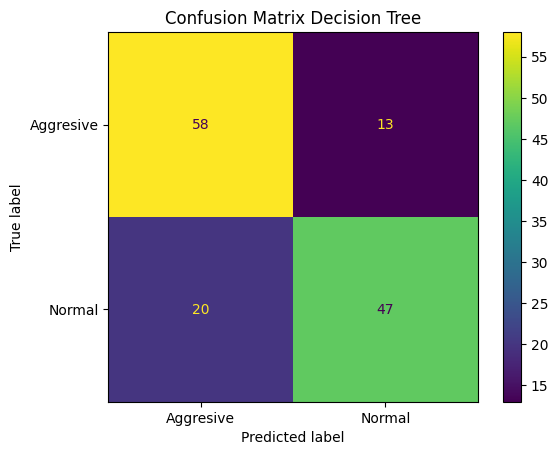

In [32]:
classes = ['Aggresive','Normal']
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt,display_labels = classes)
plt.rcParams['figure.figsize'] = [6,6]
plt.title("Confusion Matrix Decision Tree")

auc_score is:0.8364515450914441


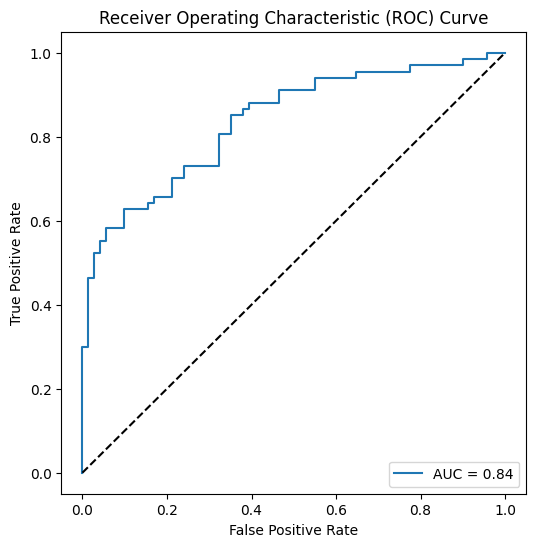

In [33]:
from sklearn.metrics import roc_curve
# Get predicted probabilities for the positive class
y_pred_prob = gb_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC Score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"auc_score is:{auc_score}")

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## "If you enjoyed my notebook, please consider giving me an upvote! Your support will help me to reach more people and make a positive impact with my work !!!!"